C:\Users\joyji\AppData\Local\Temp\ipykernel_2820\2621654449.py:12: DtypeWarning: Columns (8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('final/cleaned_AIS_data.csv')


Epoch [1/20], Loss: 0.6545
Epoch [2/20], Loss: 0.6399
Epoch [3/20], Loss: 0.6260
Epoch [4/20], Loss: 0.6128
Epoch [5/20], Loss: 0.6005
Epoch [6/20], Loss: 0.5888
Epoch [7/20], Loss: 0.5778
Epoch [8/20], Loss: 0.5673
Epoch [9/20], Loss: 0.5573
Epoch [10/20], Loss: 0.5476
Epoch [11/20], Loss: 0.5384
Epoch [12/20], Loss: 0.5294
Epoch [13/20], Loss: 0.5208
Epoch [14/20], Loss: 0.5123
Epoch [15/20], Loss: 0.5039
Epoch [16/20], Loss: 0.4956
Epoch [17/20], Loss: 0.4874
Epoch [18/20], Loss: 0.4794
Epoch [19/20], Loss: 0.4714
Epoch [20/20], Loss: 0.4635
Model Accuracy: 91.25%


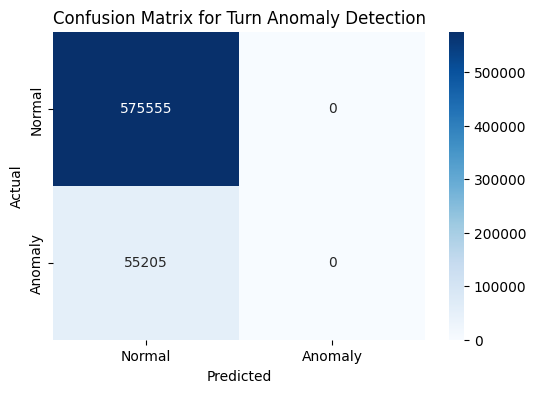

In [1]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# 1️⃣ Load AIS Data
df = pd.read_csv('final/cleaned_AIS_data.csv')
df['BaseDateTime'] = pd.to_datetime(df['BaseDateTime'])

# 2️⃣ Compute Turn Angles (ΔCOG)
df['COG_diff'] = df.groupby('MMSI')['COG'].diff().abs()

# 3️⃣ Label Sharp Turns (>30° as anomaly)
df['turn_anomaly'] = (df['COG_diff'] > 30).astype(int)

# 4️⃣ Select Relevant Features
features = ['COG', 'SOG', 'Heading']
X = df[features].fillna(0)
y = df['turn_anomaly']

# 5️⃣ Standardize Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 6️⃣ Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# 7️⃣ Define Evidential Neural Network (ENN) Model
class ENN(nn.Module):
    def __init__(self, input_dim):
        super(ENN, self).__init__()
        self.fc1 = nn.Linear(input_dim, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 2)  # Binary classification (Normal, Anomaly)
        self.relu = nn.ReLU()
    
    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        return self.fc3(x)

# 8️⃣ Initialize Model, Loss, and Optimizer
model = ENN(input_dim=X_train.shape[1])
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 9️⃣ Train the Model
num_epochs = 20
for epoch in range(num_epochs):
    model.train()
    inputs = torch.tensor(X_train, dtype=torch.float32)
    labels = torch.tensor(y_train.values, dtype=torch.long)
    
    optimizer.zero_grad()
    outputs = model(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()
    
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

# 🔟 Evaluate the Model
model.eval()
with torch.no_grad():
    inputs = torch.tensor(X_test, dtype=torch.float32)
    outputs = model(inputs)
    _, predicted = torch.max(outputs, 1)

accuracy = (predicted.numpy() == y_test.values).mean()
print(f"Model Accuracy: {accuracy * 100:.2f}%")

# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Anomaly'], yticklabels=['Normal', 'Anomaly'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Turn Anomaly Detection')
plt.show()


In [3]:
!pip install imbalanced-learn


   ---------------------------------------- 0.0/258.3 kB ? eta -:--:--
   - -------------------------------------- 10.2/258.3 kB ? eta -:--:--
   ------ -------------------------------- 41.0/258.3 kB 653.6 kB/s eta 0:00:01
   ------------------------- -------------- 163.8/258.3 kB 1.6 MB/s eta 0:00:01
   ---------------------------------------- 258.3/258.3 kB 1.8 MB/s eta 0:00:00


C:\Users\joyji\AppData\Local\Temp\ipykernel_2820\3231220777.py:13: DtypeWarning: Columns (8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('final/cleaned_AIS_data.csv')


Epoch [1/30], Loss: 0.7083
Epoch [2/30], Loss: 0.6417
Epoch [3/30], Loss: 0.5838
Epoch [4/30], Loss: 0.5334
Epoch [5/30], Loss: 0.4896
Epoch [6/30], Loss: 0.4514
Epoch [7/30], Loss: 0.4182
Epoch [8/30], Loss: 0.3894
Epoch [9/30], Loss: 0.3646
Epoch [10/30], Loss: 0.3432
Epoch [11/30], Loss: 0.3248
Epoch [12/30], Loss: 0.3091
Epoch [13/30], Loss: 0.2953
Epoch [14/30], Loss: 0.2833
Epoch [15/30], Loss: 0.2726
Epoch [16/30], Loss: 0.2630
Epoch [17/30], Loss: 0.2543
Epoch [18/30], Loss: 0.2459
Epoch [19/30], Loss: 0.2381
Epoch [20/30], Loss: 0.2305
Epoch [21/30], Loss: 0.2231
Epoch [22/30], Loss: 0.2159
Epoch [23/30], Loss: 0.2087
Epoch [24/30], Loss: 0.2016
Epoch [25/30], Loss: 0.1947
Epoch [26/30], Loss: 0.1878
Epoch [27/30], Loss: 0.1812
Epoch [28/30], Loss: 0.1746
Epoch [29/30], Loss: 0.1684
Epoch [30/30], Loss: 0.1623
Model Accuracy: 96.19%


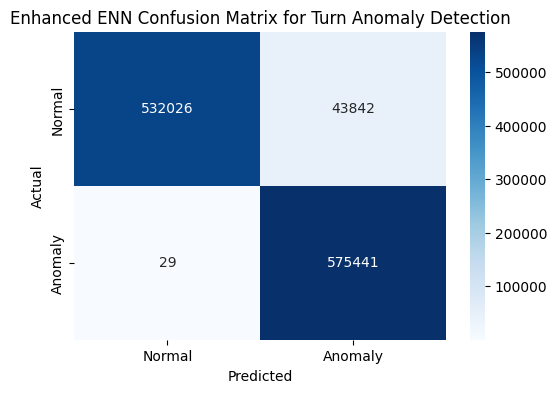

In [4]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

# 1️⃣ Load AIS Data
df = pd.read_csv('final/cleaned_AIS_data.csv')
df['BaseDateTime'] = pd.to_datetime(df['BaseDateTime'])

# 2️⃣ Compute Turn Angles (ΔCOG)
df['COG_diff'] = df.groupby('MMSI')['COG'].diff().abs()

# 3️⃣ Label Sharp Turns (>30° as anomaly)
df['turn_anomaly'] = (df['COG_diff'] > 30).astype(int)

# 4️⃣ Feature Engineering: Include rate of change in COG and SOG
df['SOG_diff'] = df.groupby('MMSI')['SOG'].diff().abs()
features = ['COG', 'SOG', 'Heading', 'COG_diff', 'SOG_diff']
X = df[features].fillna(0)
y = df['turn_anomaly']

# 5️⃣ Standardize Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 6️⃣ Handle Class Imbalance with SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# 7️⃣ Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# 8️⃣ Define Enhanced ENN Model
class EnhancedENN(nn.Module):
    def __init__(self, input_dim):
        super(EnhancedENN, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)
        self.dropout1 = nn.Dropout(0.3)
        self.fc2 = nn.Linear(128, 64)
        self.dropout2 = nn.Dropout(0.3)
        self.fc3 = nn.Linear(64, 2)
        self.relu = nn.ReLU()
    
    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.dropout1(x)
        x = self.relu(self.fc2(x))
        x = self.dropout2(x)
        return self.fc3(x)

# 9️⃣ Initialize Model, Weighted Loss, and Optimizer
model = EnhancedENN(input_dim=X_train.shape[1])
class_weights = torch.tensor([1.0, 5.0])  # Penalize anomalies more heavily
criterion = nn.CrossEntropyLoss(weight=class_weights)
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 🔟 Train the Model
num_epochs = 30
for epoch in range(num_epochs):
    model.train()
    inputs = torch.tensor(X_train, dtype=torch.float32)
    labels = torch.tensor(y_train.values, dtype=torch.long)
    
    optimizer.zero_grad()
    outputs = model(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()
    
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

# 1️⃣1️⃣ Evaluate the Model
model.eval()
with torch.no_grad():
    inputs = torch.tensor(X_test, dtype=torch.float32)
    outputs = model(inputs)
    _, predicted = torch.max(outputs, 1)

accuracy = (predicted.numpy() == y_test.values).mean()
print(f"Model Accuracy: {accuracy * 100:.2f}%")

# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Anomaly'], yticklabels=['Normal', 'Anomaly'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Enhanced ENN Confusion Matrix for Turn Anomaly Detection')
plt.show()


Model Accuracy: 96.19%


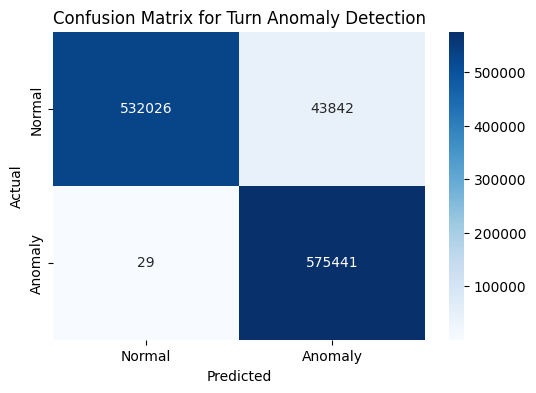


Classification Report:
              precision    recall  f1-score   support

      Normal       1.00      0.92      0.96    575868
     Anomaly       0.93      1.00      0.96    575470

    accuracy                           0.96   1151338
   macro avg       0.96      0.96      0.96   1151338
weighted avg       0.96      0.96      0.96   1151338

Precision: 0.9292
Recall: 0.9999
F1-Score: 0.9633
ROC-AUC Score: 0.9619


In [7]:
import pandas as pd
import numpy as np
import torch
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'predicted' and 'y_test' are already available
# If not, load them from saved files or variables

# 1️⃣ Evaluate Model Performance
accuracy = (predicted.numpy() == y_test.values).mean()
print(f"Model Accuracy: {accuracy * 100:.2f}%")

# 2️⃣ Confusion Matrix
cm = confusion_matrix(y_test, predicted)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Anomaly'], yticklabels=['Normal', 'Anomaly'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Turn Anomaly Detection')
plt.show()

# 3️⃣ Classification Report
print("\nClassification Report:")
print(classification_report(y_test, predicted, target_names=['Normal', 'Anomaly']))

# 4️⃣ Additional Metrics
precision = precision_score(y_test, predicted)
recall = recall_score(y_test, predicted)
f1 = f1_score(y_test, predicted)
roc_auc = roc_auc_score(y_test, predicted)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC-AUC Score: {roc_auc:.4f}")
